In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#text transformation (stopwords,lowering,stemming) and creating bag of words model using TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns

import datetime

In [3]:
df_cl = pd.read_csv('tweets_transformed_1.csv')
df_cl.head()

,Unnamed: 0,timestamp,followers,friends,retweets,favorites,entitites,mentions,hashtags,urls,hash_count,senti_strength,overall_senti
0,0,Tue Oct 01 00:05:56 +0000 2019,10,38,0,0,7,1,iggy,0,1,4,Highly positive
1,1,Tue Oct 01 00:15:06 +0000 2019,629,2864,1,1,3,1,RAW,0,1,0,Neutral
2,3,Tue Oct 01 01:09:13 +0000 2019,841,2214,1,0,5,5,TIDAL,1,1,0,Neutral
3,4,Tue Oct 01 01:09:53 +0000 2019,1169,14,8,20,3,1,NCT127,1,1,1,positive
4,5,Tue Oct 01 02:21:11 +0000 2019,353,434,4,14,5,1,DipikaKakar Sonakshi KahaanHumKahaanTum,0,3,0,Neutral


In [4]:
df_cl.dtypes

Unnamed: 0         int64
timestamp         object
followers          int64
friends            int64
retweets           int64
favorites          int64
entitites          int64
mentions           int64
hashtags          object
urls               int64
hash_count         int64
senti_strength     int64
overall_senti     object
dtype: object

In [5]:
df_cl = df_cl.dropna()
df_cl.count()

Unnamed: 0        677004
timestamp         677004
followers         677004
friends           677004
retweets          677004
favorites         677004
entitites         677004
mentions          677004
hashtags          677004
urls              677004
hash_count        677004
senti_strength    677004
overall_senti     677004
dtype: int64

# Data Analysis

In [ ]:
# df_cl['time'] =[datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df_cl['timestamp']]
df_cl['time'] = [d.hour for d in df_cl['time']] 
no_of_tweets_time=df_cl['time'].value_counts()
#print(no_of_tweets)

[Text(0, 0.5, 'No. of Tweets'),
 Text(0.5, 0, '24-H-Format'),
 Text(0.5, 1.0, 'Retweets distribution')]

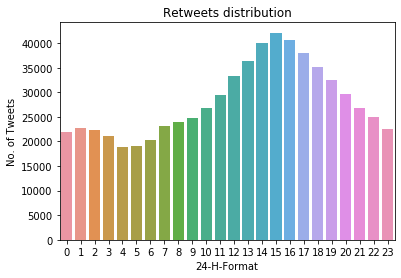

In [7]:
ax=sns.barplot(y=no_of_tweets_time.values, x=no_of_tweets_time.index)
ax.set(xlabel='24-H-Format', ylabel='No. of Tweets',title='Retweets distribution')

In [8]:
df_cl['year'] =[datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df_cl['timestamp']]
df_cl['year'] = [d.year for d in df_cl['year']] 
no_of_tweets_year=df_cl['year'].value_counts()

[Text(0, 0.5, 'No. of reweets'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Retweets distribution')]

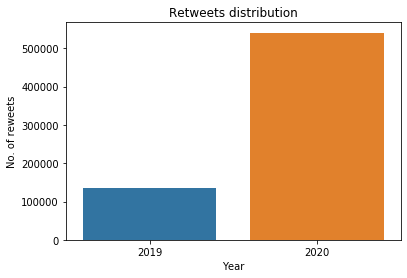

In [9]:
ax=sns.barplot(y=no_of_tweets_year.values, x=no_of_tweets_year.index)
ax.set(xlabel='Year', ylabel='No. of reweets',title='Retweets distribution')

In [10]:
df_cl['month'] =[datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df_cl['timestamp']]
df_cl['month'] = [d.month for d in df_cl['month']] 
no_of_tweets_month=df_cl['month'].value_counts()

[Text(0, 0.5, 'No. of retweets'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Retweets distribution')]

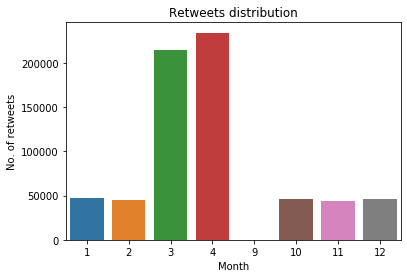

In [11]:
ax=sns.barplot(y=no_of_tweets_month.values, x=no_of_tweets_month.index)
ax.set(xlabel='Month', ylabel='No. of retweets',title='Retweets distribution')

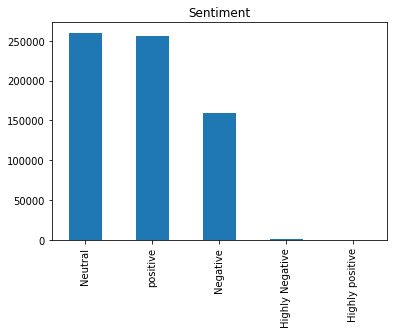

In [12]:
target_count = df_cl.overall_senti.value_counts()
target_count.plot(kind='bar', title='Sentiment');



In [13]:
def senti_classes(x):
    if (x['senti_strength'] >= 1):
        return 'positive'
    elif (x['senti_strength'] <= -1):
        return 'Negative'
    elif (x['senti_strength'] == 0):
        return 'Neutral'
df_cl = df_cl.assign(overall_senti=df_cl.apply(senti_classes, axis=1))

In [14]:
rt = df_cl[df_cl['retweets'] >= 1]
print(f"The percentage of retweets is {round(len(rt)/len(df_cl)*100)}% of all the tweets")


The percentage of retweets is 62% of all the tweets


In [15]:
df_cl['rt_flag'] = df_cl[['retweets']].applymap(lambda x: True if x >=1 else False)

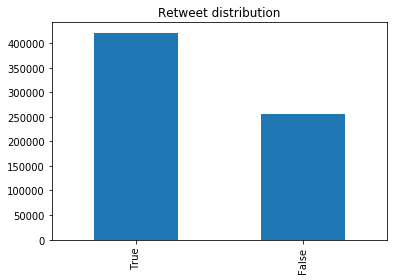

In [16]:
rt_count = df_cl.rt_flag.value_counts()

rt_count.plot(kind='bar', title='Retweet distribution');


In [17]:
rt_m = df_cl[ (df_cl['mentions'] >= 1) & (df_cl['retweets'] >= 1) ]
print(f"The percentage of retweets with mentions is {round(len(rt_m)/len(rt)*100)}% of all the Retweets")

The percentage of retweets with mentions is 100% of all the Retweets


In [18]:
rt_fv = df_cl[ (df_cl['favorites'] >=1) & (df_cl['retweets'] >= 1) ]
print(f"The percentage of retweets with favorites is {round(len(rt_fv)/len(rt)*100)}% of all the Retweets")

The percentage of retweets with favorites is 91% of all the Retweets


In [19]:
RT_Fr = df_cl[ (df_cl['followers'] > 1000) & (df_cl['retweets'] >= 1) ]
print(f"The percentage of retweets with more followers is {round(len(RT_Fr)/len(rt)*100)}% of all the Retweets")
#More the followers the retweet percentage is decreasing.

The percentage of retweets with more followers is 72% of all the Retweets


In [20]:
RT_ht = df_cl[(df_cl['retweets'] >= 1) & (df_cl['hash_count'] >= 1)]
print(f"The percentage of retweets with  hashtags is {round(len(RT_ht)/len(rt)*100)}% of all the Retweets")

The percentage of retweets with  hashtags is 100% of all the Retweets


(20000, 25000)

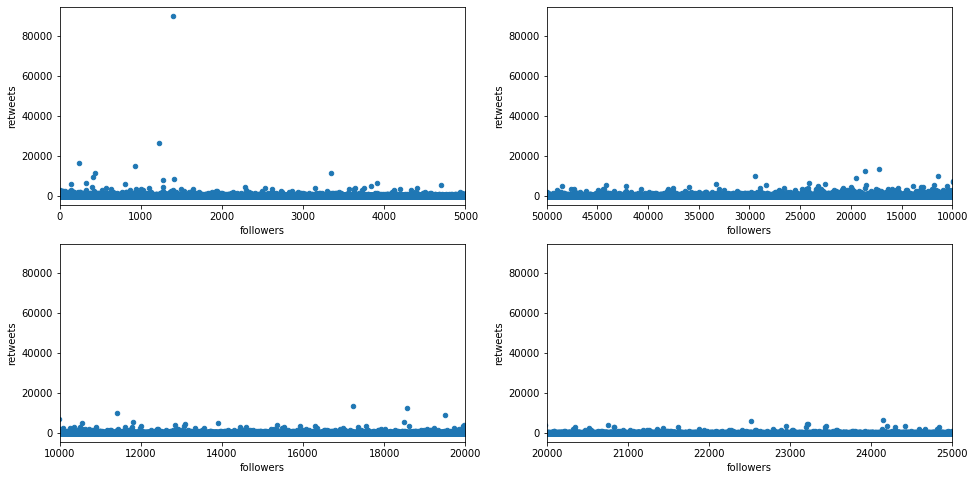

In [21]:
fig, axs = plt.subplots(2, 2)
df_cl.plot(kind='scatter', x='followers', y='retweets',ax=axs[0,0],figsize=(16,8))
df_cl.plot(kind='scatter', x='followers', y='retweets', ax=axs[0,1])
df_cl.plot(kind='scatter', x='followers', y='retweets', ax=axs[1,0])
df_cl.plot(kind='scatter', x='followers', y='retweets', ax=axs[1,1])
axs[0,0].set_xlim(0,5000)
axs[0,1].set_xlim(50000,10000)
axs[1,0].set_xlim(10000,20000)
axs[1,1].set_xlim(20000,25000)
#No clear relation is seen

In [22]:
t_y = [len(rt_m), len(rt_fv), len(RT_Fr),len(RT_ht)]
t_x = ['Mentions', 'Favourites', 'Followers ', 'Hashtags']

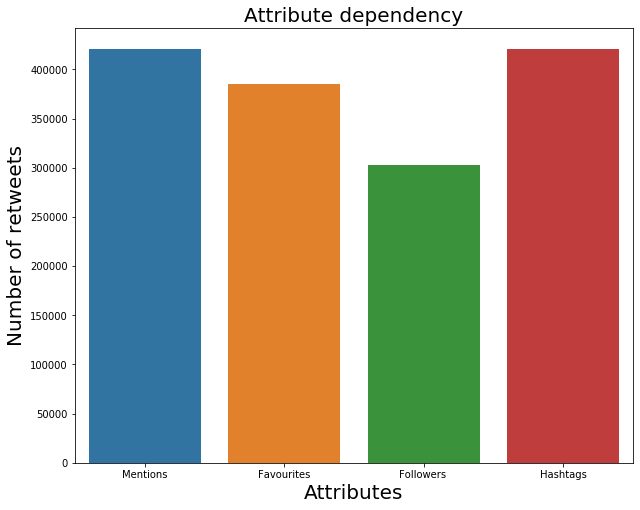

In [23]:
plt.figure(figsize=(10,8))
plt.title('Attribute dependency', fontsize = 20)
plt.xlabel('Attributes',fontsize = 20)
plt.ylabel('Number of retweets',fontsize = 20)
sns.barplot(x = t_x, y = t_y)

plt.show()

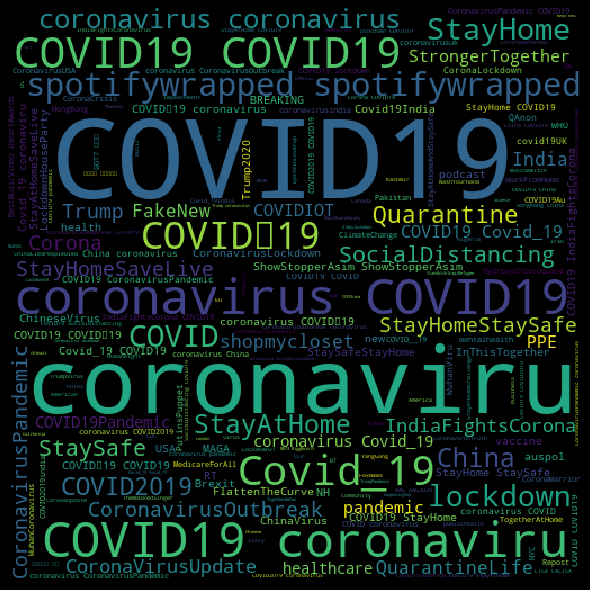

In [26]:
from wordcloud import WordCloud
hash_wc= ' '.join(list(df_cl['hashtags']))
wc = WordCloud(width = 512,height = 512).generate(hash_wc)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [27]:
rt_neu = df_cl[(df_cl['rt_flag'] ==True) & (df_cl['overall_senti'] == 'Neutral')]
rt_neu
print(f"The percentage of retweets with  neutral sentiment is {round(len(rt_neu)/len(rt)*100)}% of all the Retweets")
neu = round(len(rt_neu)/len(rt)*100)

The percentage of retweets with  neutral sentiment is 38% of all the Retweets


In [28]:
rt_pos = df_cl[(df_cl['rt_flag'] ==True) & (df_cl['overall_senti'] == 'positive')]
rt_pos
print(f"The percentage of retweets with  neutral sentiment is {round(len(rt_pos)/len(rt)*100)}% of all the Retweets")
pos = round(len(rt_pos)/len(rt)*100)

The percentage of retweets with  neutral sentiment is 38% of all the Retweets


In [29]:
rt_neg = df_cl[(df_cl['rt_flag'] ==True) & (df_cl['overall_senti'] == 'Negative')]
rt_neg
print(f"The percentage of retweets with  negative sentiment is {round(len(rt_neg)/len(rt)*100)}% of all the Retweets")
neg = round(len(rt_neg)/len(rt)*100)

The percentage of retweets with  negative sentiment is 24% of all the Retweets


In [30]:
rt_y = [pos, neu, neg]
rt_x = ['Postive retweets', 'Neutral retweets', 'Negative retweets']
pd_pi = ['rt_x','rt_y']

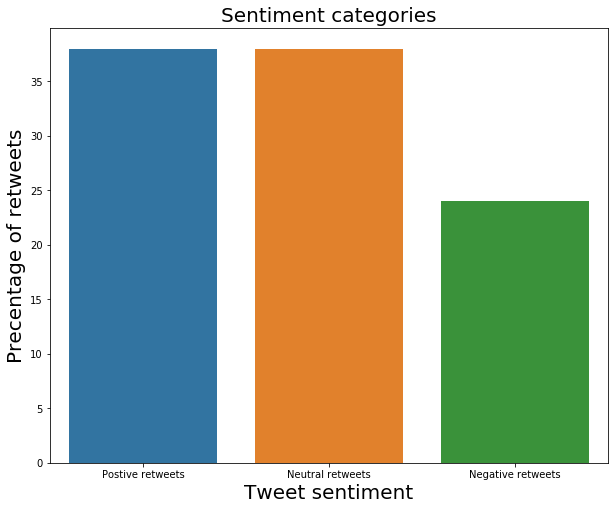

In [31]:
plt.figure(figsize=(10,8))
plt.title('Sentiment categories', fontsize = 20)
plt.xlabel('Tweet sentiment',fontsize = 20)
plt.ylabel('Precentage of retweets',fontsize = 20)
sns.barplot(x = rt_x, y = rt_y)

plt.show()

In [32]:
df_cl.head()

,Unnamed: 0,timestamp,followers,friends,retweets,favorites,entitites,mentions,hashtags,urls,hash_count,senti_strength,overall_senti,time,year,month,rt_flag
0,0,Tue Oct 01 00:05:56 +0000 2019,10,38,0,0,7,1,iggy,0,1,4,positive,0,2019,10,False
1,1,Tue Oct 01 00:15:06 +0000 2019,629,2864,1,1,3,1,RAW,0,1,0,Neutral,0,2019,10,True
2,3,Tue Oct 01 01:09:13 +0000 2019,841,2214,1,0,5,5,TIDAL,1,1,0,Neutral,1,2019,10,True
3,4,Tue Oct 01 01:09:53 +0000 2019,1169,14,8,20,3,1,NCT127,1,1,1,positive,1,2019,10,True
4,5,Tue Oct 01 02:21:11 +0000 2019,353,434,4,14,5,1,DipikaKakar Sonakshi KahaanHumKahaanTum,0,3,0,Neutral,2,2019,10,True


In [33]:
df_cl.count()

Unnamed: 0        677004
timestamp         677004
followers         677004
friends           677004
retweets          677004
favorites         677004
entitites         677004
mentions          677004
hashtags          677004
urls              677004
hash_count        677004
senti_strength    677004
overall_senti     677004
time              677004
year              677004
month             677004
rt_flag           677004
dtype: int64

# Correlation Analysis for feature selection

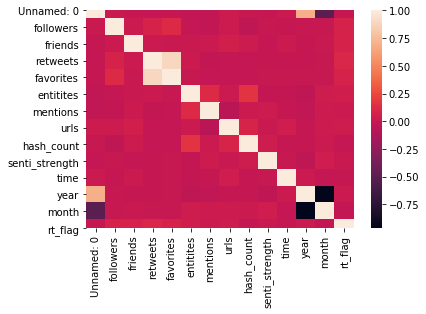

In [34]:
corr=df_cl
heat=corr.corr()

sns.heatmap(heat)

In [35]:

from sklearn.preprocessing import StandardScaler
corr1=df_cl[['followers','friends','retweets','favorites','entitites',
         'mentions','hash_count','urls','senti_strength','time','rt_flag']]
df_final = corr1
scaler = StandardScaler()
scaler.fit(df_final)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Linear Regression Model

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df_final.drop('retweets',axis=1)
Y= df_final.retweets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred0=lr.predict(X_test)

In [40]:
print(np.sqrt(mean_squared_error(y_test, y_pred0)))
print(mean_absolute_error(y_test, y_pred0))
print(r2_score(y_test,y_pred0))

97.69308241288121
20.470831310703034
0.8803768273420143


In [41]:
print("Actual vs Predicted using Linear Regression")
pd.DataFrame({'Predicted Retweet':y_pred0,'Actual Retweets':y_test})

Actual vs Predicted using Linear Regression


,Predicted Retweet,Actual Retweets
440839,29.475420,18
9002,38.532250,14
494072,1.284269,0
465145,-1.325694,0
311004,15.238590,1
...,...,...
653701,-2.920772,0
642497,19.783544,17
291143,21.104059,21
68074,51.959226,14


# Cross Validation for Linear Regression

In [42]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statistics 
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(lr, X, Y, cv=cv, n_jobs=-1)
print (statistics.mean(scores))

0.754507573557021


In [43]:
lr_cv = statistics.mean(scores)
lr_cv

0.754507573557021

# Random Forest Regressor 

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(random_state=0,bootstrap=True)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [46]:
y2_pred=rf.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y2_pred))

157.47566224616193

In [48]:
mean_absolute_error(y_test, y2_pred)

15.214943339946426

In [49]:

r2_score(y_test,y2_pred)

0.6891759763933383

In [50]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':y2_pred,'Actual Retweets':y_test})

Actual vs Predicted using Random Forest


,Predicted Retweet,Actual Retweets
440839,25.47,18
9002,33.83,14
494072,0.00,0
465145,0.00,0
311004,1.86,1
...,...,...
653701,0.00,0
642497,14.61,17
291143,20.42,21
68074,22.41,14


# Cross Validation for Random Forest regressor

In [51]:
#The number of splits can be changed as trial and error method
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores_rf = cross_val_score(rf, X, Y, cv=cv, n_jobs=-1)


In [52]:
rf_cv = statistics.mean(scores_rf)
rf_cv

0.7540160569338653

# Polynomial Linear regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures 

plr = PolynomialFeatures(2, interaction_only=True)
output_nparray = plr.fit_transform(df_final)
output_df = pd.DataFrame(output_nparray)

X1=output_df

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.3)
lr1=LinearRegression()
lr1.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
y3_pred=lr1.predict(X1_test)

In [56]:
np.sqrt(mean_squared_error(y1_test, y3_pred))

1.0349910895009357e-06

In [57]:
mean_absolute_error(y1_test, y3_pred)

5.613452610913149e-07

In [58]:
r2_score(y1_test,y3_pred)

1.0

In [59]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':y3_pred,'Actual Retweets':y1_test})

Actual vs Predicted using Random Forest


,Predicted Retweet,Actual Retweets
668151,4.000000e+00,4
642501,3.187515e-07,0
118706,1.029292e-07,0
249085,9.999991e-01,1
426707,1.366675e-06,0
...,...,...
262532,7.400000e+01,74
209631,3.200000e+01,32
356171,8.800000e+01,88
175620,3.000000e+01,30


# RNN LSTM model

In [60]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.callbacks import ModelCheckpoint , EarlyStopping



from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

Using TensorFlow backend.


In [65]:
model = Sequential()
model.add(Dense(output_dim = 32  , activation = 'relu' , input_dim = 10))
model.add(Dense(output_dim = 64 , activation = 'relu'))
model.add(Dense(output_dim = 64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 128 , activation = 'relu'))
model.add(Dense(output_dim = 1))

C:\New folder\Python\envs\Keras_tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=10, units=32)`
  
C:\New folder\Python\envs\Keras_tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\New folder\Python\envs\Keras_tf\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  after removing the cwd from sys.path.
C:\New folder\Python\envs\Keras_tf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\New folder\Python\envs\Keras_tf\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 15,073
Trainable params: 15,073
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [68]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs = 10 , shuffle = True)
#history = model.fit(X_train, y_train, epochs=10, validation_split = 0.33, validation_data=(X_test, y_test))





Train on 473902 samples, validate on 203102 samples
Epoch 1/10





473902/473902 [==============================] - 22s 46us/step - loss: 74927432.1125 - val_loss: 26137.0255
Epoch 2/10
473902/473902 [==============================] - 19s 41us/step - loss: 73140.5117 - val_loss: 36907.8514
Epoch 3/10
473902/473902 [==============================] - 21s 44us/step - loss: 40905.4090 - val_loss: 45752.5570
Epoch 4/10
473902/473902 [==============================] - 22s 46us/step - loss: 47520.8590 - val_loss: 42561.0598
Epoch 5/10
473902/473902 [==============================] - 22s 46us/step - loss: 408045.0338 - val_loss: 25231.6822
Epoch 6/10
473902/473902 [==============================] - 22s 47us/step - loss: 55361.0400 - val_loss: 33204.9468
Epoch 7/10
473902/473902 [==============================] - 22s 47us/step - loss: 48653.7267 - val_loss: 56956.0916
Epoch 8/10
473902/473902 [==============================] - 23s 48us/step - loss: 37490229.9819 - val_loss: 95801.6687
Epoch

In [69]:
y4_pred=model.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, y4_pred))

166.93699287736985

In [71]:
mean_absolute_error(y_test, y4_pred)


34.90384049224057

In [72]:
r2_score(y_test,y4_pred)

0.6507046023292777

In [73]:
Eva_Mtx={'Model':['Linear Regression','Random Forest Regressor','RNN-LSTM','Polynomial Regression' ],'RMSE':' ','MEA':' ','R_Square':' '}
Eva_Mtx=pd.DataFrame(Eva_Mtx)
Eva_Mtx.set_index(['Model'],inplace=True)
Eva_Mtx

,RMSE,MEA,R_Square
Model,,,
Linear Regression,,,
Random Forest Regressor,,,
RNN-LSTM,,,
Polynomial Regression,,,


In [74]:
yh=[lr.predict(X_test),rf.predict(X_test),model.predict(X_test),lr1.predict(X1_test)]

In [75]:
for n in range(0,1):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=np.sqrt(mean_squared_error(y1_test, y3_pred))
            break
            
        Eva_Mtx.iloc[m][n]=np.sqrt(mean_squared_error(y_test, yh[m]))
        
for n in range(1,2):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=mean_absolute_error(y1_test, y3_pred)
            break
            
        Eva_Mtx.iloc[m][n]=mean_absolute_error(y_test, yh[m])

for n in range(2,3):
    for m in range(0,4):
        if(m==3):
            Eva_Mtx.iloc[m][n]=r2_score(y1_test, y3_pred)
            break
            
        Eva_Mtx.iloc[m][n]=r2_score(y_test, yh[m])        
        
Eva_Mtx

,RMSE,MEA,R_Square
Model,,,
Linear Regression,97.6931,20.4708,0.880377
Random Forest Regressor,157.476,15.2149,0.689176
RNN-LSTM,166.937,34.9038,0.650705
Polynomial Regression,1.03499e-06,5.61345e-07,1
